# Arboles de Decisión (Decision Trees)
Katlyn Mackness <br>
14/12/2024 - Updated 25/02/2025

## Problema
Imagina que eres un investigador médico que recopila datos para un estudio. Has recopilado datos sobre un conjunto de pacientes, todos ellos con la misma enfermedad. 

Durante su tratamiento, cada paciente ha respondido a uno de los 5 medicamentos: el fármaco A, el fármaco B, el fármaco c, el fármaco X y el Y.

## Objetivo
Construye un modelo para averiguar qué medicamento podría ser apropiado para un futuro paciente con la misma enfermedad.

In [1]:
# Importar bibliotécas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import warnings 
warnings.filterwarnings('ignore')

In [11]:
# Cargar los datos
data = pd.read_csv("Data/drugs.csv")
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


## Limpieza de Datos

In [12]:
# Convertir las variables predictoras cualitativas de esta base a una escala numérica.
feature_cols = ["Age", "Sex", "BP", "Cholesterol", "Na_to_K"]
X = data[feature_cols].values
y = data.Drug

In [14]:
# Ver los datos explanatarios 
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [16]:
# Ver la lista de la variable Y
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [21]:
# Ver todos valores posibles para la presión arterial
data["BP"].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [20]:
# Ver todos los valores posibles para el colesterol
data["Cholesterol"].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [22]:
# Codificar los valores para el análisis
Cod_BP = preprocessing.LabelEncoder()
Cod_BP.fit(['HIGH', 'NORMAL', 'LOW'])
X[:,2] = Cod_BP.transform(X[:,2])

Cod_Cholesterol = preprocessing.LabelEncoder()
Cod_Cholesterol.fit(['HIGH', 'NORMAL'])
X[:,3] = Cod_Cholesterol.transform(X[:,3])

In [23]:
Cod_Sex = preprocessing.LabelEncoder()
Cod_Sex.fit(['F', 'M'])
X[:,1] = Cod_Sex.transform(X[:,1])

In [24]:
# Ver los resultados
X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

## Modelado de Datos con Árboles de Decisión 
Pruebe con los dos criterios (Gini y Entropía) y diversos niveles de profundidad para encontrar el modelo más preciso.

In [25]:
# Creación de grupos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [54]:
# Crear objeto de clasificación del árbol de decisión con criterio de gini
clf = DecisionTreeClassifier(criterion = "gini")

# Aplicacion del algoritmo de árboles de decisión de entrenamiento
clf = clf.fit(X_train, y_train)

# Predicción de la respuesta para el grupo de prueba
y_pred = clf.predict(X_test)

In [55]:
# Estadísticas de desempeño con Gini
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       0.67      1.00      0.80         4
       drugB       1.00      0.67      0.80         6
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        19
       drugY       1.00      1.00      1.00        27

    accuracy                           0.97        60
   macro avg       0.93      0.93      0.92        60
weighted avg       0.98      0.97      0.97        60



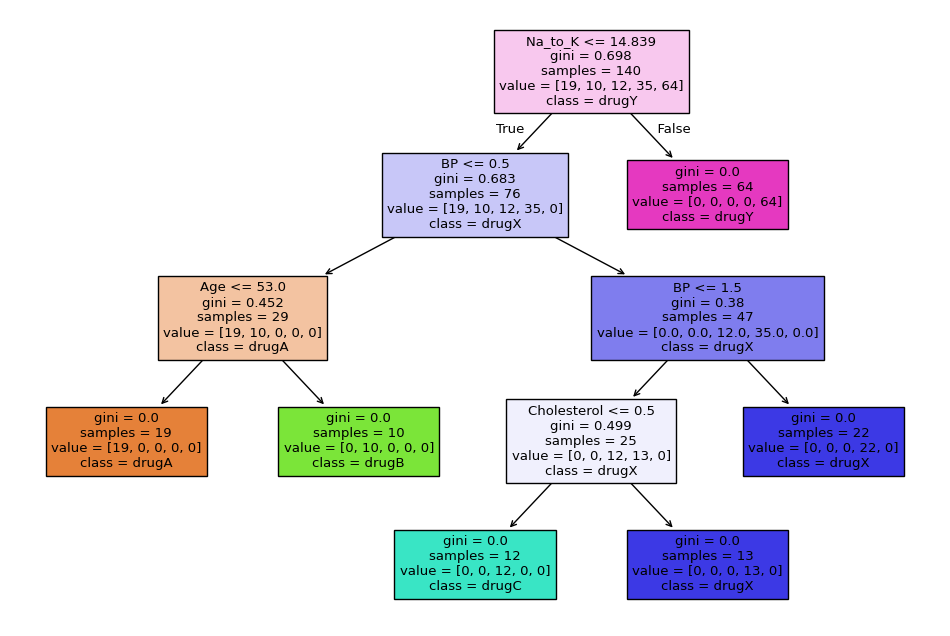

In [56]:
# Visualizar el gráfico del árbol de decisión
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=feature_cols, class_names = ["drugA", "drugB", "drugC", "drugX", "drugY",])
plt.show()

In [57]:
# Crear objeto de clasificación del árbol de decisión con criterio de entropía
clf = DecisionTreeClassifier(criterion = "entropy", max_depth = 4)

# Aplicacion del algoritmo de árboles de decisión de entrenamiento
clf = clf.fit(X_train, y_train)

# Predicción de la respuesta para el grupo de prueba
y_pred = clf.predict(X_test)

In [58]:
# Evaluar modelo con entropía
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       0.67      1.00      0.80         4
       drugB       1.00      0.67      0.80         6
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        19
       drugY       1.00      1.00      1.00        27

    accuracy                           0.97        60
   macro avg       0.93      0.93      0.92        60
weighted avg       0.98      0.97      0.97        60



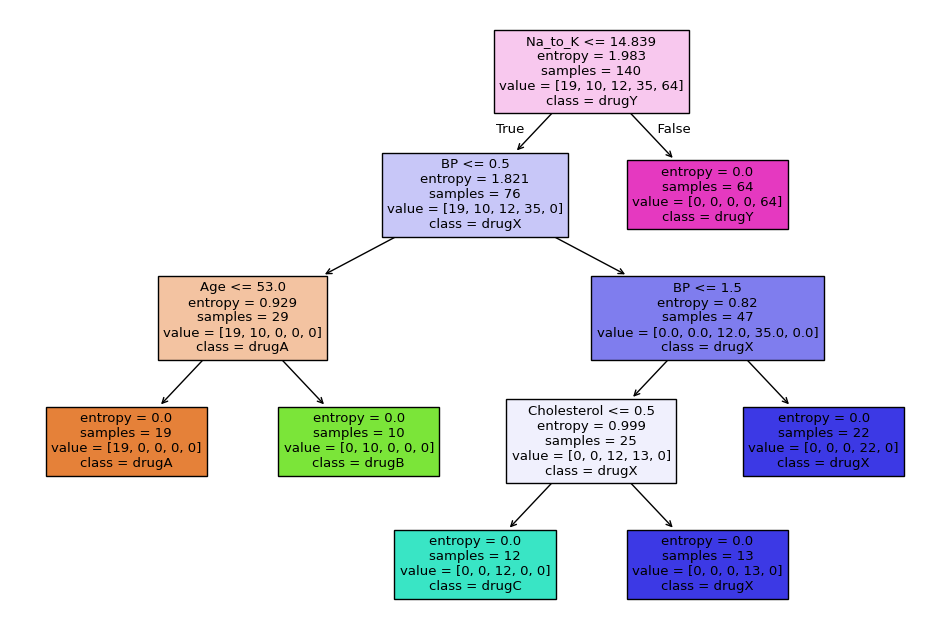

In [59]:
# Visualizar el árbol
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=feature_cols, class_names = ["drugA", "drugB", "drugC", "drugX", "drugY",])
plt.show()

## Predicción

In [49]:
# Usar datos nuevos para hacer una predicción para un nuevo paciente
new_data = np.array([[23,0,2,0,15.302]])
prediccion = clf.predict(new_data)
print(prediccion)

['drugY']
